In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
data = pd.read_csv(r'G:/1 - Data Analyst/Data/2025-04-01/Viral_Social_Media_Trends.csv').fillna("")
data.info()
data['Percent_Likes'] = (data['Likes']/data['Views']*100).round(2)
data['Percent_Shares'] = (data['Shares']/data['Views']*100).round(2)
data['Percent_Comments'] = (data['Comments']/data['Views']*100).round(2)
data.to_csv(r'G:/1 - Data Analyst/Final Data/2025-04-01/Viral_Social_Media_Trends.csv', index=False)
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level,Percent_Likes,Percent_Shares,Percent_Comments
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High,8.15,1.28,0.46
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium,5.18,1.58,0.66
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium,8.92,1.08,0.99
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low,13.85,1.27,4.01
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium,264.18,107.27,9.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Post_4996,YouTube,#Education,Video,Japan,4258236,381509,59209,4674,High,8.96,1.39,0.11
4996,Post_4997,Instagram,#Education,Video,UK,4841525,166266,54841,4832,Medium,3.43,1.13,0.10
4997,Post_4998,YouTube,#Fashion,Shorts,USA,2004080,32401,75229,33875,Low,1.62,3.75,1.69
4998,Post_4999,Instagram,#Gaming,Shorts,Canada,2221665,46996,12954,42832,Low,2.12,0.58,1.93


In [ ]:
cols = ['Views', 'Likes', 'Shares', 'Comments']
correlation_matrix = data[cols].corr()
# Hiển thị ma trận tương quan
correlation_matrix

,Views,Likes,Shares,Comments
Views,1.000000,-0.003177,0.013144,-0.009956
Likes,-0.003177,1.000000,0.011154,-0.011772
Shares,0.013144,0.011154,1.000000,-0.000132
Comments,-0.009956,-0.011772,-0.000132,1.000000


<H4> Lượt Views không có tương quan mạnh với bất kỳ biến nào khác (hệ số rất nhỏ, gần 0). Điều này có thể chỉ ra rằng số lượt xem không tác động đáng kể đến lượt thích, chia sẻ hoặc bình luận.

Lượt Likes có rất ít liên hệ với lượt Shares và Comments, cho thấy rằng một bài đăng có nhiều lượt thích chưa chắc đã có nhiều chia sẻ hay bình luận.

Lượt Shares và Comments gần như không có tương quan với nhau (-0.000), nghĩa là việc người dùng chia sẻ bài viết không đồng nghĩa với việc họ sẽ để lại bình luận.

Kết luận: Theo dữ liệu không có sự tương quan đáng kể nào giữa lượt View, Likes, Shares và Comment <H4>

<H10>
Từ sự tương quan trên ta có thể xác định 1 số câu hỏi sau:

    1. Nền tảng nào có lượng tương tác cao nhất?

    2. Loại nội dung nào thu hút nhiều lượt xem, thích, chia sẻ và bình luận nhất?

    3. Hashtag nào có mức độ lan truyền cao nhất?

    4. Mối quan hệ giữa mức độ tương tác và nền tảng hoặc loại nội dung?

    5. Phân tích theo khu vực (Region) để xem nơi nào có xu hướng viral mạnh nhất? <H10>


<H1> Nền tảng nào có lượng tương tác cao nhất? <h1>

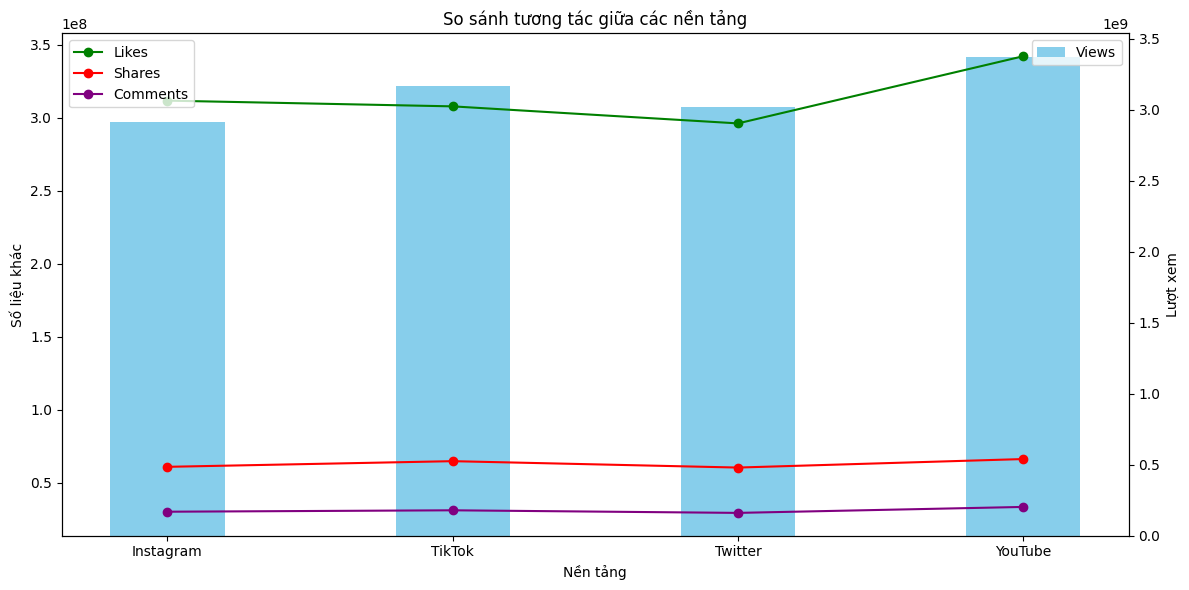

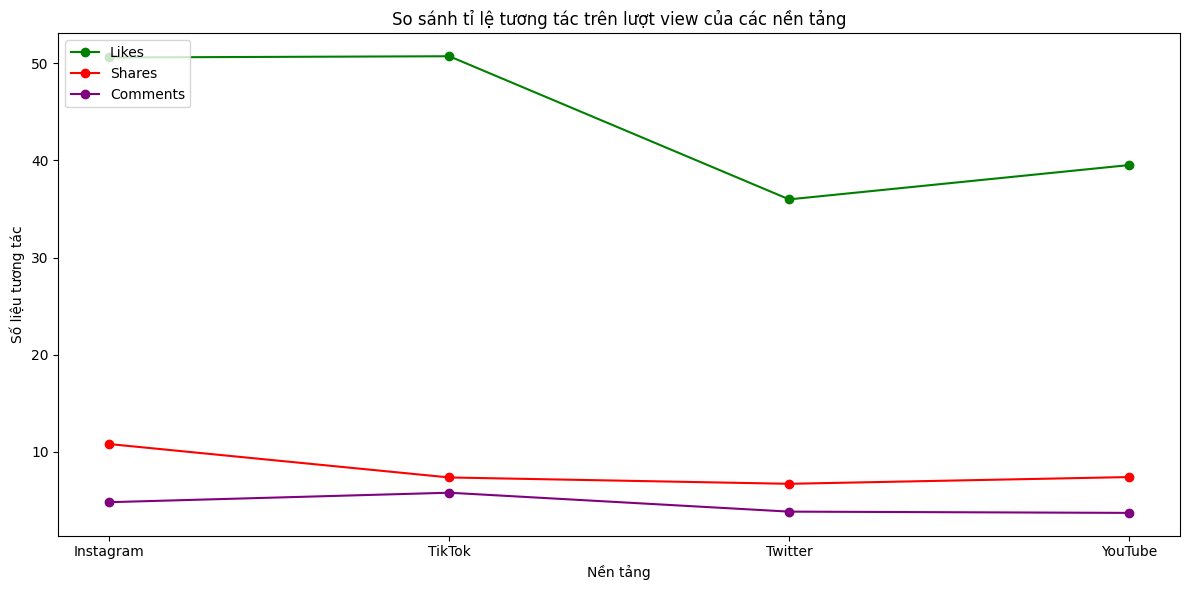

In [39]:
engagement = data.groupby(["Platform"]).agg(Views=('Views','sum')
                                            ,Likes=('Likes','sum')
                                            ,Shares=('Shares','sum')
                                            ,Comments=('Comments','sum')).reset_index()

# Vẽ biểu đồ kết hợp cột và đường
fig, ax1 = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ cột cho "Views" trên trục tung bên phải
ax2 = ax1.twinx()  # Tạo trục tung thứ hai chia sẻ trục x
ax2.bar(engagement['Platform'], engagement['Views'], color='skyblue', width=0.4, label='Views')
ax2.set_ylabel('Lượt xem', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Vẽ biểu đồ đường cho "Likes", "Shares", "Comments" trên trục tung bên trái
ax1.plot(engagement['Platform'], engagement['Likes'], color='green', marker='o', label='Likes')
ax1.plot(engagement['Platform'], engagement['Shares'], color='red', marker='o', label='Shares')
ax1.plot(engagement['Platform'], engagement['Comments'], color='purple', marker='o', label='Comments')
ax1.set_ylabel('Số liệu khác', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Thiết lập nhãn và tiêu đề
ax1.set_xlabel('Nền tảng')
plt.title('So sánh tương tác giữa các nền tảng')

# Hiển thị chú thích
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Đảm bảo biểu đồ đường đè lên biểu đồ cột
ax1.set_zorder(ax2.get_zorder() + 1)  # Đặt zorder của ax1 cao hơn ax2
ax1.patch.set_visible(False)  # Làm cho nền của ax1 trong suốt

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

#Nền tảng nào có lượng tương tác cao nhất?
engagement_percent = data.groupby(["Platform"]).agg(Percent_Likes=('Percent_Likes','mean')
                                            ,Percent_Shares=('Percent_Shares','mean')
                                            ,Percent_Comments=('Percent_Comments','mean')).reset_index()

# Vẽ biểu đồ kết hợp cột và đường
plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ đường cho "Likes", "Shares", "Comments" trên trục tung bên trái
plt.plot(engagement_percent['Platform'], engagement_percent['Percent_Likes'], color='green', marker='o', label='Likes')
plt.plot(engagement_percent['Platform'], engagement_percent['Percent_Shares'], color='red', marker='o', label='Shares')
plt.plot(engagement_percent['Platform'], engagement_percent['Percent_Comments'], color='purple', marker='o', label='Comments')
plt.ylabel('Số liệu tương tác', color='black')
plt.tick_params(axis='y', labelcolor='black')

# Thiết lập nhãn và tiêu đề
plt.xlabel('Nền tảng')
plt.title('So sánh tỉ lệ tương tác trên lượt view của các nền tảng')

# Hiển thị chú thích
plt.legend(loc='upper left')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Dựa trên số lượng ta có thể thấy:

        YouTube dẫn đầu về tất cả các chỉ số, đặc biệt là số lượt xem.

        TikTok có mức tương tác (View) cao thứ hai, nhưng lượng like thấp hơn so với YouTube, share và comment ngang với youtubeTwitter và Instagram có mức độ tương tác khá cân bằng, nhưng 
        
        Twitter có xu hướng được chia sẻ nhiều hơn.

Tuy nhiên, khi dựa trên tỉ lệ tương tác khác so với view, thì ta có thể thấy được rằng:

        Tỉ lệ likes trên Instagram và Tiktok là cao nhất với ~50% trên tổng lượt view.

        Instagram có tỉ lệ shares cao nhất trong các nền tảng

        Tiktok thì có tỉ lệ comments cao nhất trong các nền tảng

Đánh giá: 

        Dựa trên dữ liệu ta có thể thấy được rằng, nếu chạy theo số lượng lượt view và like mà không màng tới tỉ lệ tương tác, Youtube là 1 lựa chọn tốt nhất khi mà lượt view khá cao.
        
        Nếu muốn có tỉ lệ like/view cao thì nên lựa chọn Instagram và TikTok. Thiên hướng chủ quan hơn thì có thể chọn Instagram vì hầu hết các chỉ số tỉ lệ trên lượt view đều tốt so với mặt bằng chung, sau đó sẽ chọn TikTok


<h1>Loại nội dung nào thu hút nhiều lượt xem, thích, chia sẻ và bình luận nhất? <h1>


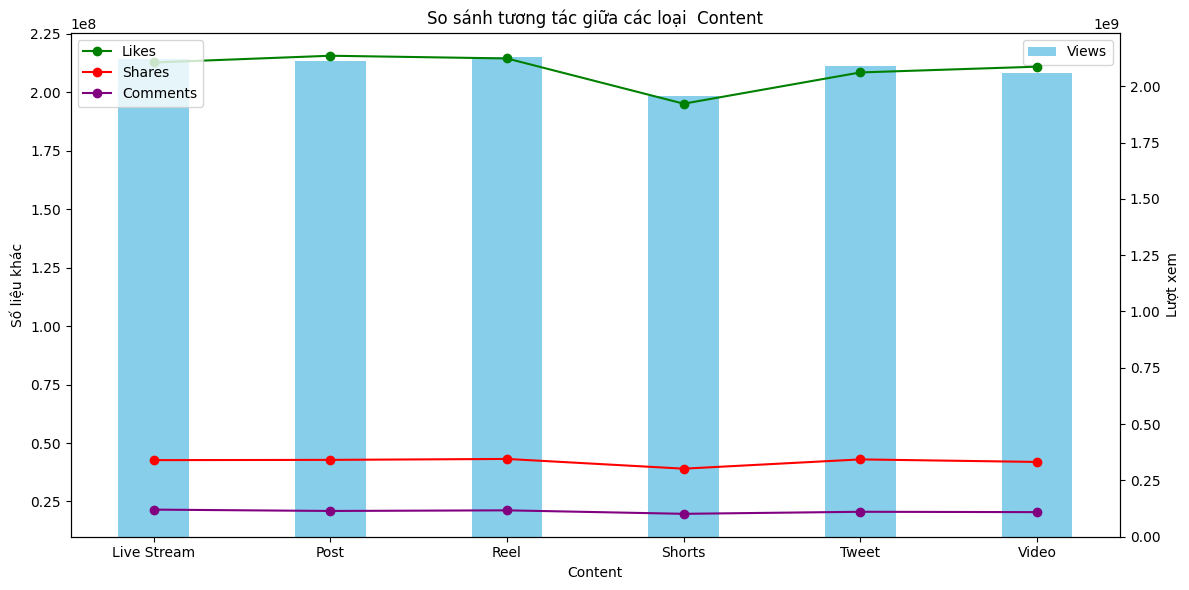

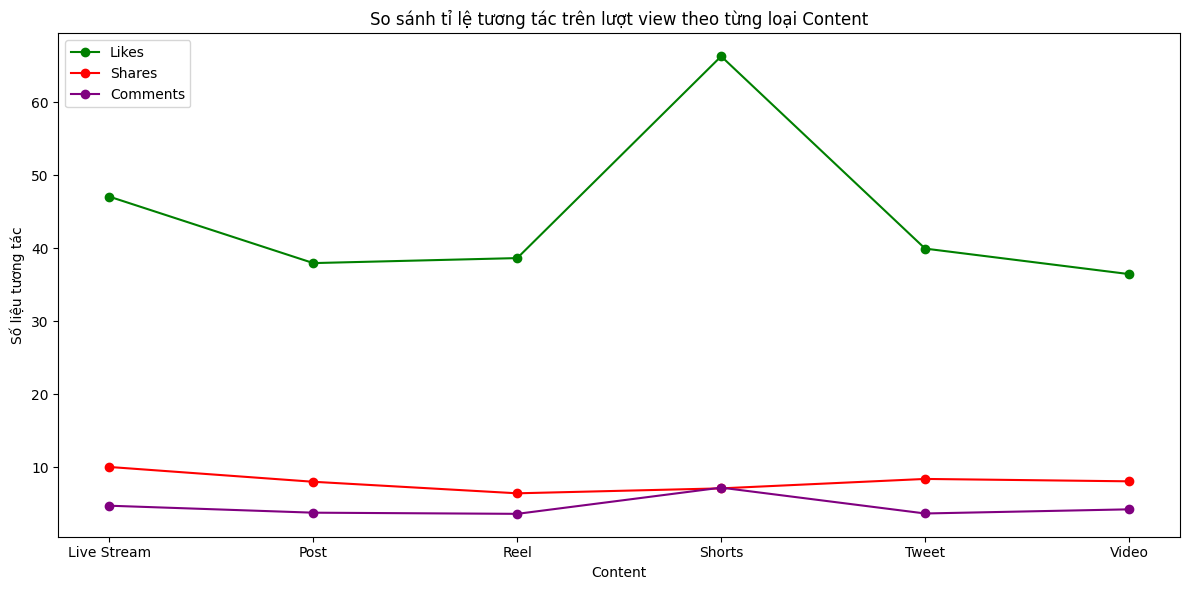

In [44]:
engagement = data.groupby(["Content_Type"]).agg(Views=('Views','sum')
                                            ,Likes=('Likes','sum')
                                            ,Shares=('Shares','sum')
                                            ,Comments=('Comments','sum')).reset_index()

# Vẽ biểu đồ kết hợp cột và đường
fig, ax1 = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ cột cho "Views" trên trục tung bên phải
ax2 = ax1.twinx()  # Tạo trục tung thứ hai chia sẻ trục x
ax2.bar(engagement['Content_Type'], engagement['Views'], color='skyblue', width=0.4, label='Views')
ax2.set_ylabel('Lượt xem', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Vẽ biểu đồ đường cho "Likes", "Shares", "Comments" trên trục tung bên trái
ax1.plot(engagement['Content_Type'], engagement['Likes'], color='green', marker='o', label='Likes')
ax1.plot(engagement['Content_Type'], engagement['Shares'], color='red', marker='o', label='Shares')
ax1.plot(engagement['Content_Type'], engagement['Comments'], color='purple', marker='o', label='Comments')
ax1.set_ylabel('Số liệu khác', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Thiết lập nhãn và tiêu đề
ax1.set_xlabel('Content')
plt.title('So sánh tương tác giữa các loại  Content')

# Hiển thị chú thích
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Đảm bảo biểu đồ đường đè lên biểu đồ cột
ax1.set_zorder(ax2.get_zorder() + 1)  # Đặt zorder của ax1 cao hơn ax2
ax1.patch.set_visible(False)  # Làm cho nền của ax1 trong suốt

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

#Nền tảng nào có lượng tương tác cao nhất?
engagement_percent = data.groupby(["Content_Type"]).agg(Percent_Likes=('Percent_Likes','mean')
                                            ,Percent_Shares=('Percent_Shares','mean')
                                            ,Percent_Comments=('Percent_Comments','mean')).reset_index()

# Vẽ biểu đồ kết hợp cột và đường
plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ đường cho "Likes", "Shares", "Comments" trên trục tung bên trái
plt.plot(engagement_percent['Content_Type'], engagement_percent['Percent_Likes'], color='green', marker='o', label='Likes')
plt.plot(engagement_percent['Content_Type'], engagement_percent['Percent_Shares'], color='red', marker='o', label='Shares')
plt.plot(engagement_percent['Content_Type'], engagement_percent['Percent_Comments'], color='purple', marker='o', label='Comments')
plt.ylabel('Số liệu tương tác', color='black')
plt.tick_params(axis='y', labelcolor='black')

# Thiết lập nhãn và tiêu đề
plt.xlabel('Content')
plt.title('So sánh tỉ lệ tương tác trên lượt view theo từng loại Content')

# Hiển thị chú thích
plt.legend(loc='upper left')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Dựa trên số lượng ta có thể thấy:

        Reel và Live Stream có mức độ tương tác cao nhất, cho thấy nội dung đăng tải trên Reel và livestream có độ viral mạnh.

        Shorts có số lượng tương tác khá thấp.

        Ở trung lập ta thấy có Tweet, Post và Video có số lượng tương tác trung lập

Tuy nhiên, khi dựa trên tỉ lệ tương tác khác so với view, thì ta có thể thấy được rằng:

        Tỉ lệ Like/View của Shorts là cao nhất và cao hơn rất nhiều so với các content khác, như thế này cho thấy thuật toán tăng lượt like ở content short là rất tốt

        Tương tự thì tỉ lệ Comments/View của Shorts cũng thuộc top 1 như trên

        Hầu hết tỉ lệ tương tác ở các content khác khá là bão hòa

Đánh giá: 

        Dựa trên dữ liệu ta có thể thấy được rằng, Reel và Live Stream và 2 content mạnh có thể đầu tư vào
        
        Tuy tỉ lệ like/view ở short khá cao nhưng có lẽ đây là content mới và có được sự hỗ trợ của thuật toán trên các nền tảng hỗ trợ người dùng bấm like dễ dàng hơn khi xem shorts cho thấy được việc shorts đang ngày càng phát triển. Có thể cân nhắc đầu tư vào short trong tương lai.

<h1>Hashtag nào có mức độ lan truyền cao nhất?<h1>

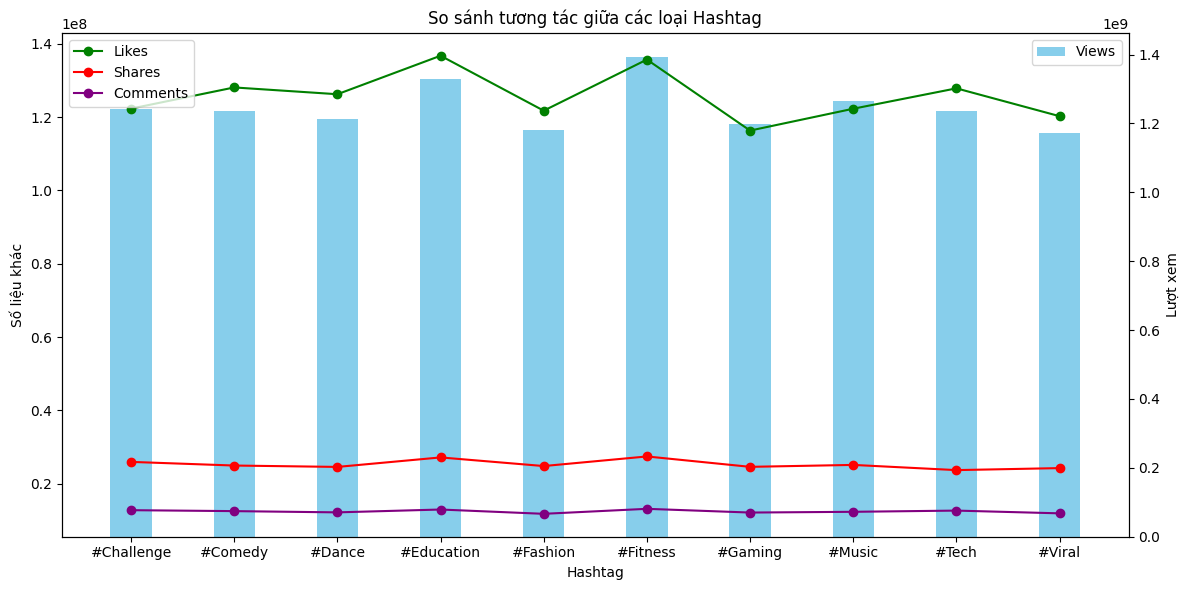

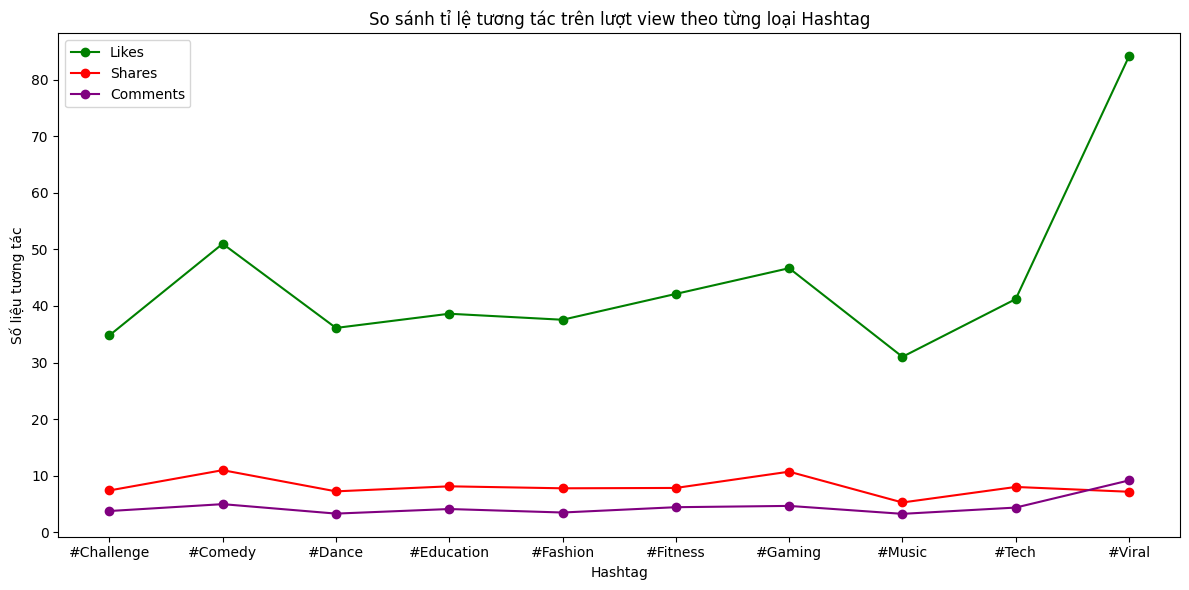

In [48]:
engagement = data.groupby(["Hashtag"]).agg(Views=('Views','sum')
                                            ,Likes=('Likes','sum')
                                            ,Shares=('Shares','sum')
                                            ,Comments=('Comments','sum')).reset_index()

# Vẽ biểu đồ kết hợp cột và đường
fig, ax1 = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ cột cho "Views" trên trục tung bên phải
ax2 = ax1.twinx()  # Tạo trục tung thứ hai chia sẻ trục x
ax2.bar(engagement['Hashtag'], engagement['Views'], color='skyblue', width=0.4, label='Views')
ax2.set_ylabel('Lượt xem', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Vẽ biểu đồ đường cho "Likes", "Shares", "Comments" trên trục tung bên trái
ax1.plot(engagement['Hashtag'], engagement['Likes'], color='green', marker='o', label='Likes')
ax1.plot(engagement['Hashtag'], engagement['Shares'], color='red', marker='o', label='Shares')
ax1.plot(engagement['Hashtag'], engagement['Comments'], color='purple', marker='o', label='Comments')
ax1.set_ylabel('Số liệu khác', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Thiết lập nhãn và tiêu đề
ax1.set_xlabel('Hashtag')
plt.title('So sánh tương tác giữa các loại Hashtag')

# Hiển thị chú thích
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Đảm bảo biểu đồ đường đè lên biểu đồ cột
ax1.set_zorder(ax2.get_zorder() + 1)  # Đặt zorder của ax1 cao hơn ax2
ax1.patch.set_visible(False)  # Làm cho nền của ax1 trong suốt

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

#Nền tảng nào có lượng tương tác cao nhất?
engagement_percent = data.groupby(["Hashtag"]).agg(Percent_Likes=('Percent_Likes','mean')
                                            ,Percent_Shares=('Percent_Shares','mean')
                                            ,Percent_Comments=('Percent_Comments','mean')).reset_index()

# Vẽ biểu đồ kết hợp cột và đường
plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ đường cho "Likes", "Shares", "Comments" trên trục tung bên trái
plt.plot(engagement_percent['Hashtag'], engagement_percent['Percent_Likes'], color='green', marker='o', label='Likes')
plt.plot(engagement_percent['Hashtag'], engagement_percent['Percent_Shares'], color='red', marker='o', label='Shares')
plt.plot(engagement_percent['Hashtag'], engagement_percent['Percent_Comments'], color='purple', marker='o', label='Comments')
plt.ylabel('Số liệu tương tác', color='black')
plt.tick_params(axis='y', labelcolor='black')

# Thiết lập nhãn và tiêu đề
plt.xlabel('Hashtag')
plt.title('So sánh tỉ lệ tương tác trên lượt view theo từng loại Hashtag')

# Hiển thị chú thích
plt.legend(loc='upper left')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Dựa vào số lượng: 
        #Fitness đang là hashtag có lượng xem cao nhất, cho thấy nội dung liên quan đến thể dục và sức khỏe đang hot.

        #Education có lượng thích cao nhất, cho thấy nội dung giáo dục có giá trị cao với người xem.

        #Music, #Dance và #Gaming vẫn giữ mức độ viral ổn định, nhưng có thể cần thêm yếu tố sáng tạo để nổi bật hơn.

Dựa trên tỉ lệ:

        Có thể thấy #Viral và #Comedy đang làm tốt việc của nó là tạo sự tương tác mạnh giữa người xem và bài post khi mà hầu hết các tỉ lệ đều cao

        Tuy #Fitness và #Education khá tốt khi dựa trên số lượng, nhưng nếu dựa vào tỉ lệ có thể thấy 2 Hashtag này khá thấp vì các chỉ số khác so với View không đồng đều (View cao like,share, comment thấp)

Đánh giá:

        Có thể sử dụng Hashtag #Viral và #Comedy gắn vào các video để tăng tỉ lệ tương tác của người xem với video.

        Tuy nhiên nếu product muốn chạy theo số lượng thì cần tập trung vào những video liên quan tới #Fitness và #Education.

        Ngoài ra product có thể kết hợp 4 hashtag vào trong 1 video có liên quan tới nó để có thể kiểm tra sự tương tác và view mang lại có như kỳ vọng đề ra không.

<h1>Phân tích theo khu vực (Region) để xem nơi nào có xu hướng viral mạnh nhất? <h1>

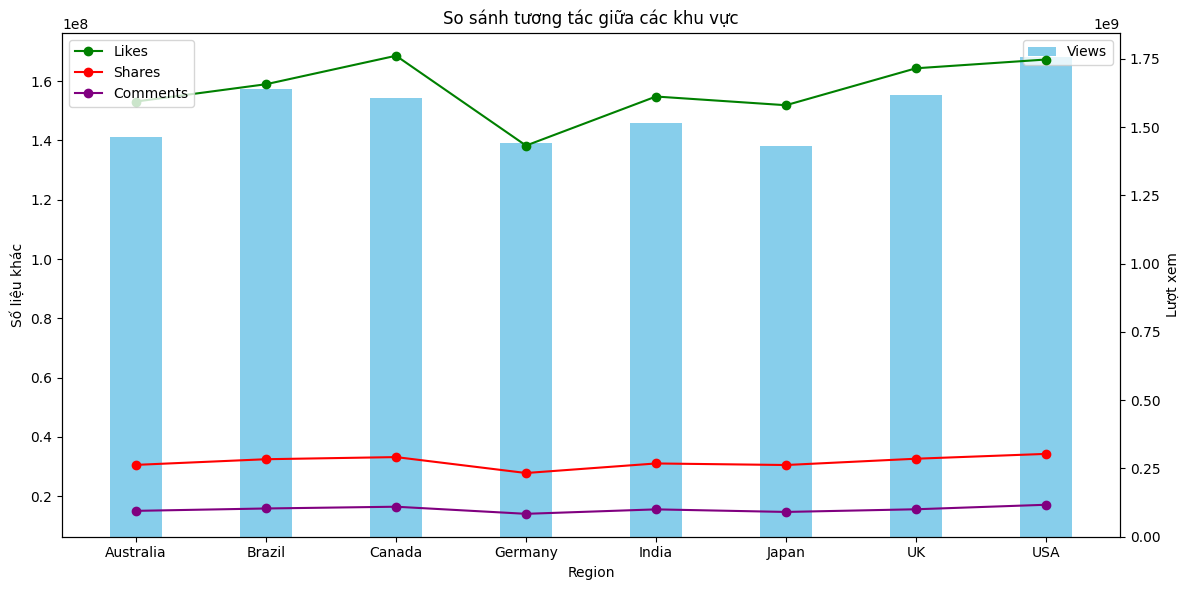

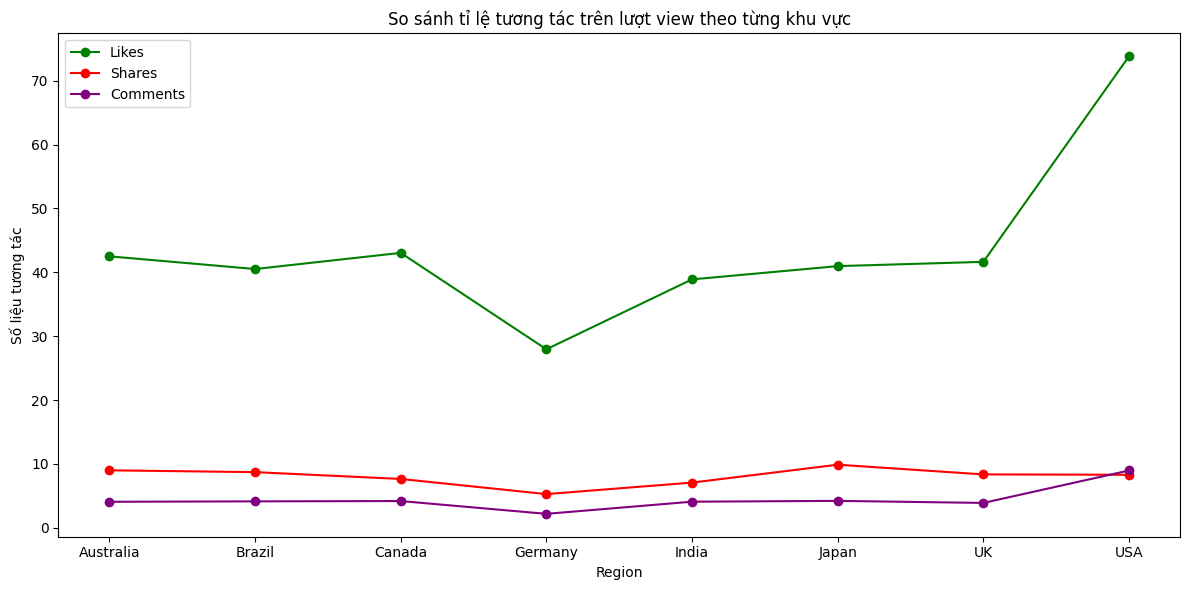

In [52]:
engagement = data.groupby(["Region"]).agg(Views=('Views','sum')
                                            ,Likes=('Likes','sum')
                                            ,Shares=('Shares','sum')
                                            ,Comments=('Comments','sum')).reset_index()

# Vẽ biểu đồ kết hợp cột và đường
fig, ax1 = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ cột cho "Views" trên trục tung bên phải
ax2 = ax1.twinx()  # Tạo trục tung thứ hai chia sẻ trục x
ax2.bar(engagement['Region'], engagement['Views'], color='skyblue', width=0.4, label='Views')
ax2.set_ylabel('Lượt xem', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Vẽ biểu đồ đường cho "Likes", "Shares", "Comments" trên trục tung bên trái
ax1.plot(engagement['Region'], engagement['Likes'], color='green', marker='o', label='Likes')
ax1.plot(engagement['Region'], engagement['Shares'], color='red', marker='o', label='Shares')
ax1.plot(engagement['Region'], engagement['Comments'], color='purple', marker='o', label='Comments')
ax1.set_ylabel('Số liệu khác', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Thiết lập nhãn và tiêu đề
ax1.set_xlabel('Region')
plt.title('So sánh tương tác giữa các khu vực')

# Hiển thị chú thích
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Đảm bảo biểu đồ đường đè lên biểu đồ cột
ax1.set_zorder(ax2.get_zorder() + 1)  # Đặt zorder của ax1 cao hơn ax2
ax1.patch.set_visible(False)  # Làm cho nền của ax1 trong suốt

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

#Nền tảng nào có lượng tương tác cao nhất?
engagement_percent = data.groupby(["Region"]).agg(Percent_Likes=('Percent_Likes','mean')
                                            ,Percent_Shares=('Percent_Shares','mean')
                                            ,Percent_Comments=('Percent_Comments','mean')).reset_index()

# Vẽ biểu đồ kết hợp cột và đường
plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ đường cho "Likes", "Shares", "Comments" trên trục tung bên trái
plt.plot(engagement_percent['Region'], engagement_percent['Percent_Likes'], color='green', marker='o', label='Likes')
plt.plot(engagement_percent['Region'], engagement_percent['Percent_Shares'], color='red', marker='o', label='Shares')
plt.plot(engagement_percent['Region'], engagement_percent['Percent_Comments'], color='purple', marker='o', label='Comments')
plt.ylabel('Số liệu tương tác', color='black')
plt.tick_params(axis='y', labelcolor='black')

# Thiết lập nhãn và tiêu đề
plt.xlabel('Region')
plt.title('So sánh tỉ lệ tương tác trên lượt view theo từng khu vực')

# Hiển thị chú thích
plt.legend(loc='upper left')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Đánh giá:

    USA có lượng xem và tương tác cao nhất tương ứng với tỉ lệ của nó, cho thấy nội dung đến từ Mỹ có sức ảnh hưởng lớn nhất trên các nền tảng xã hội.

    Brazil và Ấn Độ cũng có mức độ tương tác cao, có thể do dân số đông và người dùng tích cực trên mạng xã hội. => Có thể chạy test để kiểm tra tính hiệu quả 

    Anh, Canada, và Úc có xu hướng tương tác khá cân bằng, phù hợp để tối ưu nội dung cho đối tượng quốc tế.

    Có thể không cần post ở khu vực ở Germany khi mà tỉ lệ mọi tương tác đều khá thấp đồng thời đầu vào view cũng thấp.

Kết luận về xu hướng trending

        YouTube và TikTok là hai nền tảng có sức lan tỏa mạnh nhất.

        Reel, Live Stream, và Shorts đang thống trị nội dung viral.

        Hashtag #Fitness, #Education có mức độ lan truyền cao nhất.

        USA, Brazil, và Ấn Độ là những khu vực có nội dung dễ viral nhất.

Đề xuất chiến lược:
    
        Nếu muốn tạo nội dung viral, nên tập trung vào Reel, livestream, Shorts (Trong tương lai), và sử dụng các hashtag hot như #Fitness hoặc #Challenge, có thể thử thêm #Viral,  #Comedy hoặc kết hợp các hashtag này lại
        
        Đối với quảng cáo và chiến dịch truyền thông, YouTube và TikTok là nền tảng ưu tiên. Có thể xem xét với Instagram
        
        Nội dung nên được tối ưu hóa cho thị trường Mỹ, Brazil và Ấn Độ để đạt độ phủ sóng cao nhất.

<h1> Phân tích thị trường Mỹ <h1>

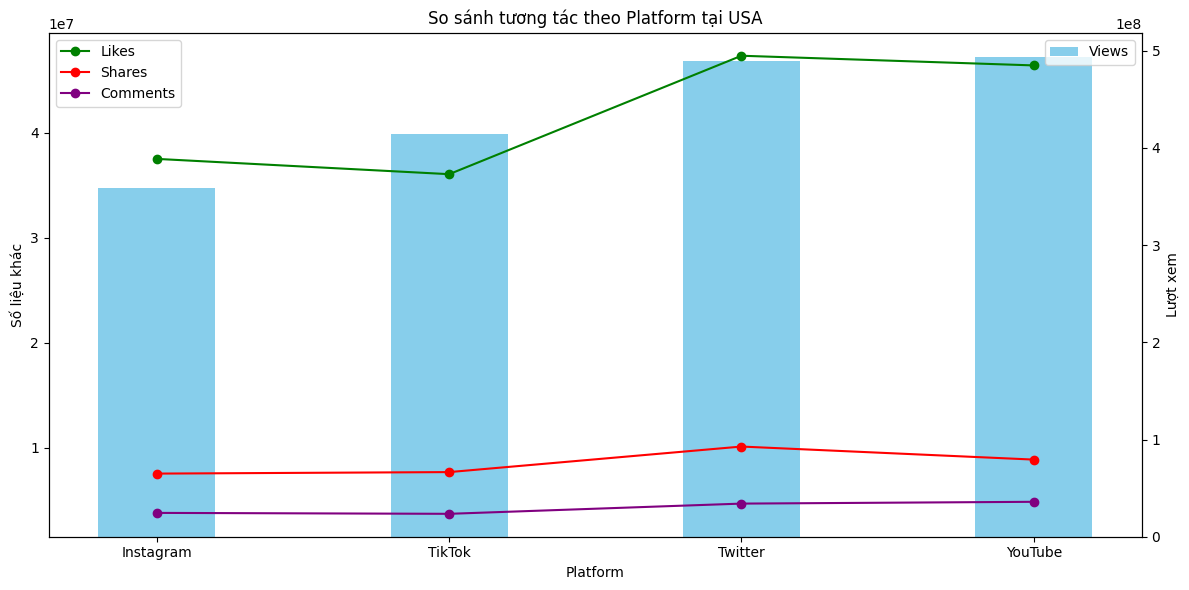

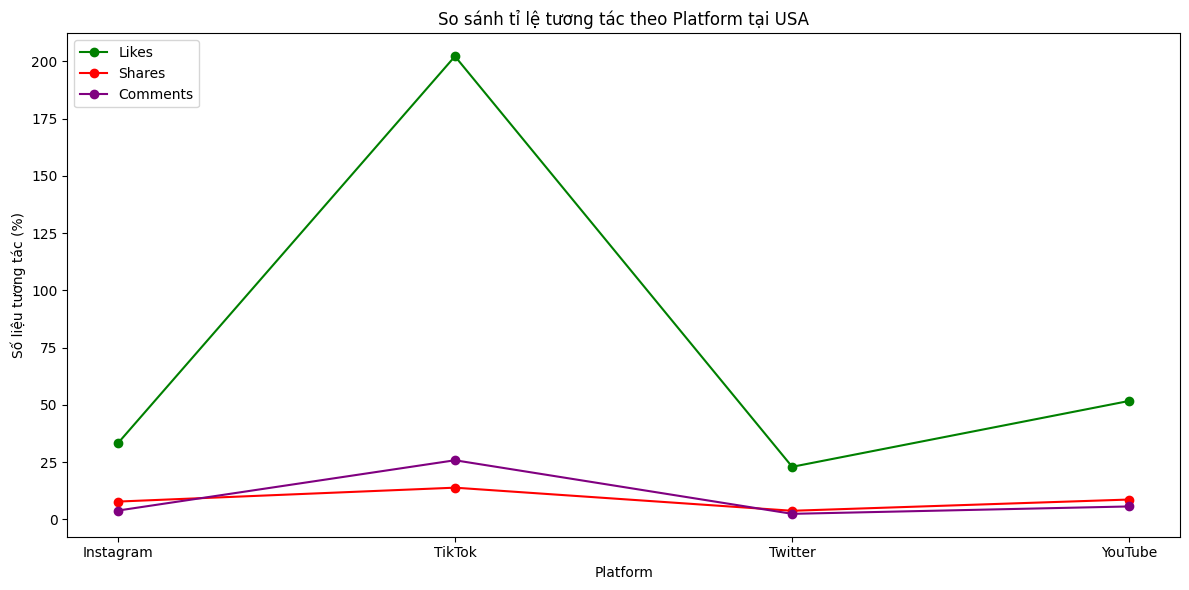

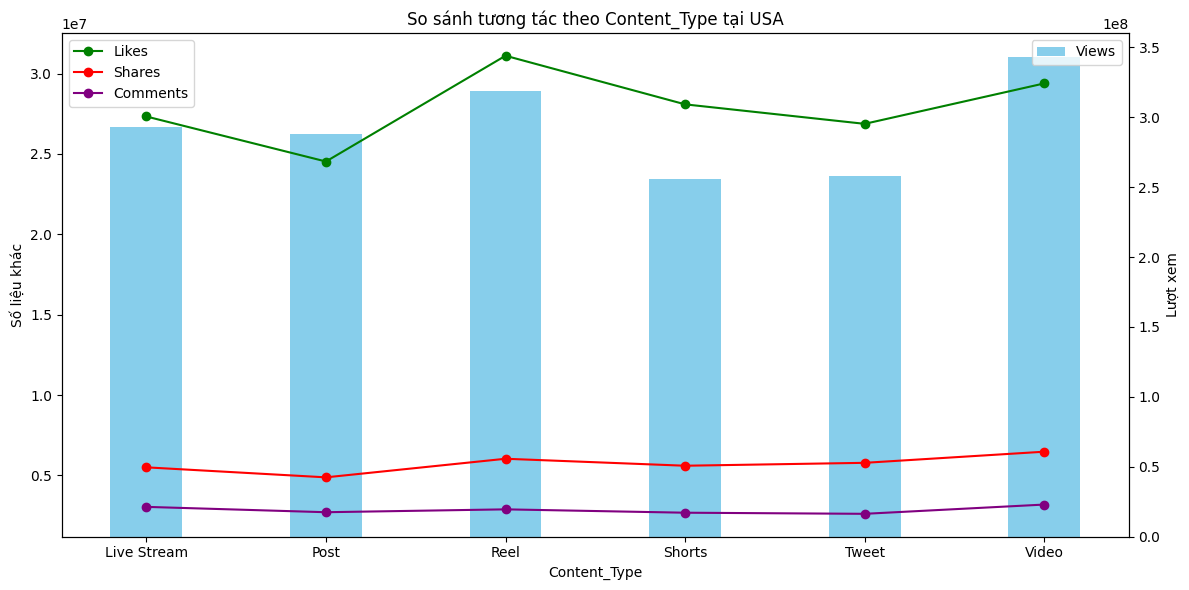

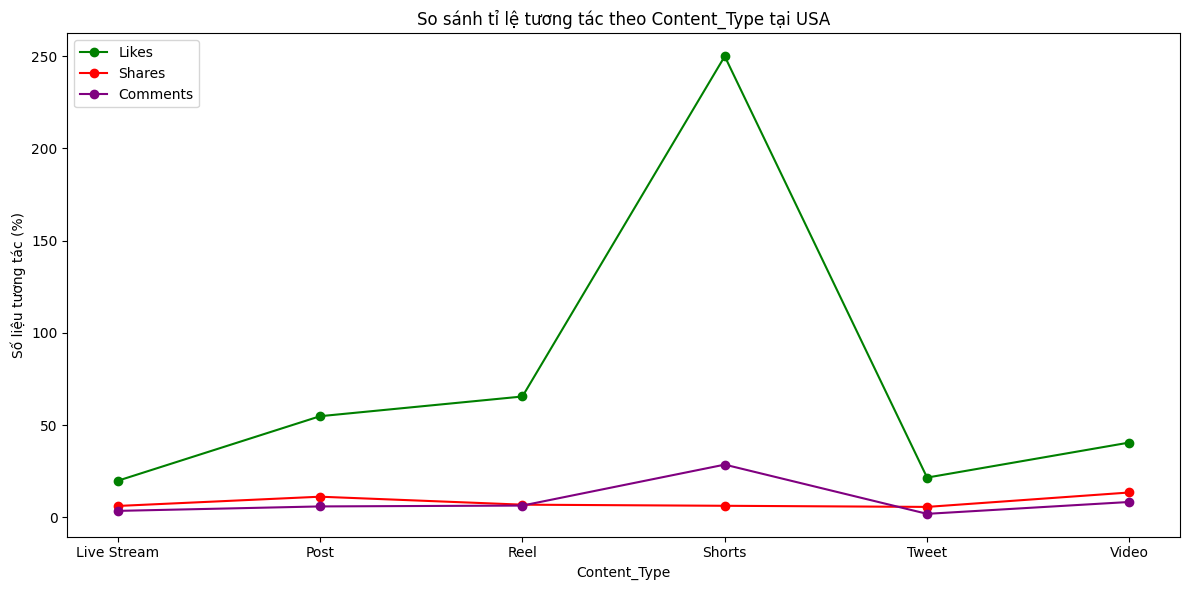

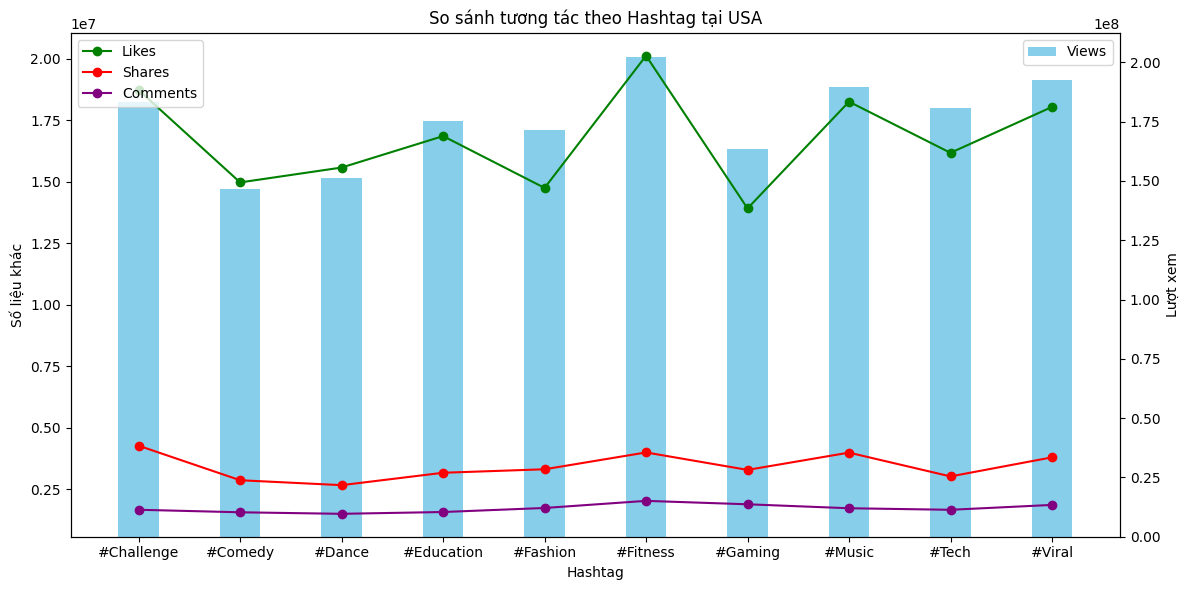

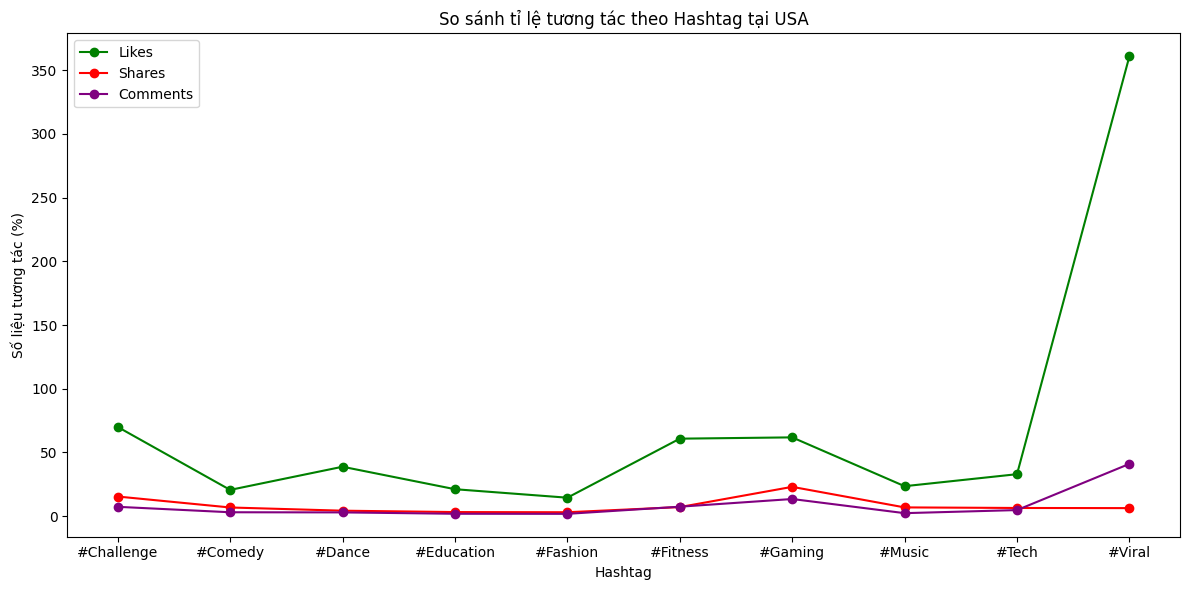

In [ ]:
def load_and_process_data(filepath):
    data = pd.read_csv(filepath).fillna("")
    data = data[data['Region'] == 'USA']
    
    for metric in ['Likes', 'Shares', 'Comments']:
        data[f'Percent_{metric}'] = (data[metric] / data['Views'] * 100).round(2)
    
    return data

def aggregate_data(data, groupby_col):
    return data.groupby([groupby_col]).agg(
        Views=('Views', 'sum'),
        Likes=('Likes', 'sum'),
        Shares=('Shares', 'sum'),
        Comments=('Comments', 'sum')
    ).reset_index()

def aggregate_percent_data(data, groupby_col):
    return data.groupby([groupby_col]).agg(
        Percent_Likes=('Percent_Likes', 'mean'),
        Percent_Shares=('Percent_Shares', 'mean'),
        Percent_Comments=('Percent_Comments', 'mean')
    ).reset_index()

def plot_combined_chart(df, x_col, title):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax2 = ax1.twinx()
    
    ax2.bar(df[x_col], df['Views'], color='skyblue', width=0.4, label='Views')
    ax2.set_ylabel('Lượt xem', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    
    for metric, color in zip(['Likes', 'Shares', 'Comments'], ['green', 'red', 'purple']):
        ax1.plot(df[x_col], df[metric], marker='o', label=metric, color=color)
    
    ax1.set_ylabel('Số liệu khác', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.set_xlabel(x_col)
    plt.title(title)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax1.set_zorder(ax2.get_zorder() + 1)
    ax1.patch.set_visible(False)
    plt.tight_layout()
    plt.show()

def plot_percentage_chart(df, x_col, title):
    plt.figure(figsize=(12, 6))
    
    for metric, color in zip(['Percent_Likes', 'Percent_Shares', 'Percent_Comments'], ['green', 'red', 'purple']):
        plt.plot(df[x_col], df[metric], marker='o', label=metric.replace('Percent_', ''), color=color)
    
    plt.ylabel('Số liệu tương tác (%)', color='black')
    plt.tick_params(axis='y', labelcolor='black')
    plt.xlabel(x_col)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

filepath = r'G:/1 - Data Analyst/Data/2025-04-01/Viral_Social_Media_Trends.csv'
data = load_and_process_data(filepath)

for category in ['Platform', 'Content_Type', 'Hashtag']:
    engagement = aggregate_data(data, category)
    engagement_percent = aggregate_percent_data(data, category)
    
    plot_combined_chart(engagement, category, f'So sánh tương tác theo {category} tại USA')
    plot_percentage_chart(engagement_percent, category, f'So sánh tỉ lệ tương tác theo {category} tại USA')

Đánh giá thị trường Mĩ:

        Tại nền tảng Tiktok các tỉ lệ đều tăng trưởng mạnh đồng thời Content reel và vdieo rất mạnh cho thấy người xem thích tương tác các video ngắn thay vì chỉ xem rồi rời đi. 
        
        Đo về lấy số lượng thì ở kênh twitter và youtube chiếm áp đảo.

        Tỉ lệ tương tác ở Shorts rất cao, có khả năng phát triển trong tương lai.

        Các hashtag #Viral, #Fitness, #Challenge ở Mĩ rất được người xem ưu chuộc. Trong đó #Viral khá đặc biệt với tỉ lệ like/view rất cao.

Đề xuất:

        Cần tạo các nội dung video Viral liên quan đến Fitness và các Challenge trên nền tảng Tiktok để phát triển tương tác trong tương lai. 

        Ở nền tảng twitter và youtube có thể áp dụng vào chạy quảng cáo, các chiến dịch truyền thông quảng bá vì ở đây lượng View rất khủng.

        Nên thử đầu tư các video chạy trên content Short vì tỉ lệ tương tác của nó mang lại rất cao mặc dù View khá thấp